In [569]:
#Import libraries and load dataset (Gl_dataset)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

gl= pd.read_excel(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Portfolio\Python_Data_analytics\RestaurantTips_analysis\Dataset\Gl_dataset.xlsx", sheet_name= 'Sheet2')
gl.head()

,Date,Amt,TipsAmt,Pct
0,2024-03-27 12:00:00,36.75,7.35,0.200000
1,2024-03-16 16:00:00,40.95,7.37,0.179976
2,2024-03-16 18:00:00,42.00,5.00,0.119048
3,2024-03-16 17:00:00,48.30,4.83,0.100000
4,2024-03-10 13:00:00,18.90,2.84,0.150265


**General data inspection**

In [570]:
#See total rows and columns 
gl.shape

(1094, 4)

In [571]:
#See columns data type
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1094 non-null   datetime64[ns]
 1   Amt      1094 non-null   float64       
 2   TipsAmt  1094 non-null   float64       
 3   Pct      1094 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.3 KB


In [572]:
#see date range 
print(gl['Date'].min())
print(gl['Date'].max())

2024-03-10 13:00:00
2024-08-05 19:00:00


In [573]:
#See how many unique days total 
# Extract just the date part and create a new column 'JustDate'
gl['JustDate'] = gl['Date'].dt.date
gl.groupby('JustDate').size().reset_index(name= 'count')

,JustDate,count
0,2024-03-10,13
1,2024-03-13,18
2,2024-03-15,25
3,2024-03-16,13
4,2024-03-17,7
5,2024-03-19,35
6,2024-03-20,36
7,2024-03-21,32
8,2024-03-22,9
9,2024-03-23,13


In [574]:
#General descriptive statistics 
gl.describe(include= 'all')

,Date,Amt,TipsAmt,Pct,JustDate
count,1094,1094.000000,1094.000000,1094.000000,1094
unique,NaN,NaN,NaN,NaN,58
top,NaN,NaN,NaN,NaN,2024-06-14
freq,NaN,NaN,NaN,NaN,43
mean,2024-04-30 09:18:55.283363840,41.829758,5.362992,0.137920,NaN
min,2024-03-10 13:00:00,0.860000,0.000000,0.000000,NaN
25%,2024-03-29 12:00:00,22.050000,2.520000,0.100000,NaN
50%,2024-04-27 05:00:00,37.800000,4.410000,0.150000,NaN
75%,2024-05-27 17:45:00,52.500000,7.560000,0.150140,NaN
max,2024-08-05 19:00:00,241.740000,51.350000,10.639535,NaN


In [575]:
#Check for duplicates 
gl[gl.duplicated(subset=['Date', 'Amt', 'TipsAmt', 'Pct'])]

,Date,Amt,TipsAmt,Pct,JustDate
10,2024-04-04 19:00:00,17.06,2.56,0.150059,2024-04-04
85,2024-03-10 18:00:00,18.90,2.84,0.150265,2024-03-10
86,2024-03-10 18:00:00,18.90,2.84,0.150265,2024-03-10
101,2024-03-25 12:00:00,18.90,3.78,0.200000,2024-03-25
165,2024-03-26 12:00:00,18.90,2.84,0.150265,2024-03-26
169,2024-03-26 19:00:00,18.90,2.84,0.150265,2024-03-26
172,2024-03-26 19:00:00,18.90,2.84,0.150265,2024-03-26
180,2024-03-26 12:00:00,16.80,2.52,0.150000,2024-03-26
225,2024-03-19 18:00:00,37.80,7.56,0.200000,2024-03-19
226,2024-03-19 18:00:00,84.00,12.60,0.150000,2024-03-19


In [576]:
'''
It is common to have duplicated values in this dataset, people can order the same amount and tip the same amount. However, there is one instance that I strongly believe its a 
mistake. Which is the last value with 30% tip above so I decided to drop one of them. 
'''
gl[(gl['Date'] == '2024-04-14 14:00:00') & (gl['Pct'] == 0.3)]

,Date,Amt,TipsAmt,Pct,JustDate
1043,2024-04-14 14:00:00,44.1,13.23,0.3,2024-04-14
1052,2024-04-14 14:00:00,44.1,13.23,0.3,2024-04-14


In [577]:
#Drop 1 duplicate
gl.drop(index= 1052, inplace= True)
gl.shape

(1093, 5)

In [578]:
#Check for any null values 
gl.isnull().sum()

Date        0
Amt         0
TipsAmt     0
Pct         0
JustDate    0
dtype: int64

**Identify outliers and distribution**

In [579]:
gl.head()

,Date,Amt,TipsAmt,Pct,JustDate
0,2024-03-27 12:00:00,36.75,7.35,0.200000,2024-03-27
1,2024-03-16 16:00:00,40.95,7.37,0.179976,2024-03-16
2,2024-03-16 18:00:00,42.00,5.00,0.119048,2024-03-16
3,2024-03-16 17:00:00,48.30,4.83,0.100000,2024-03-16
4,2024-03-10 13:00:00,18.90,2.84,0.150265,2024-03-10


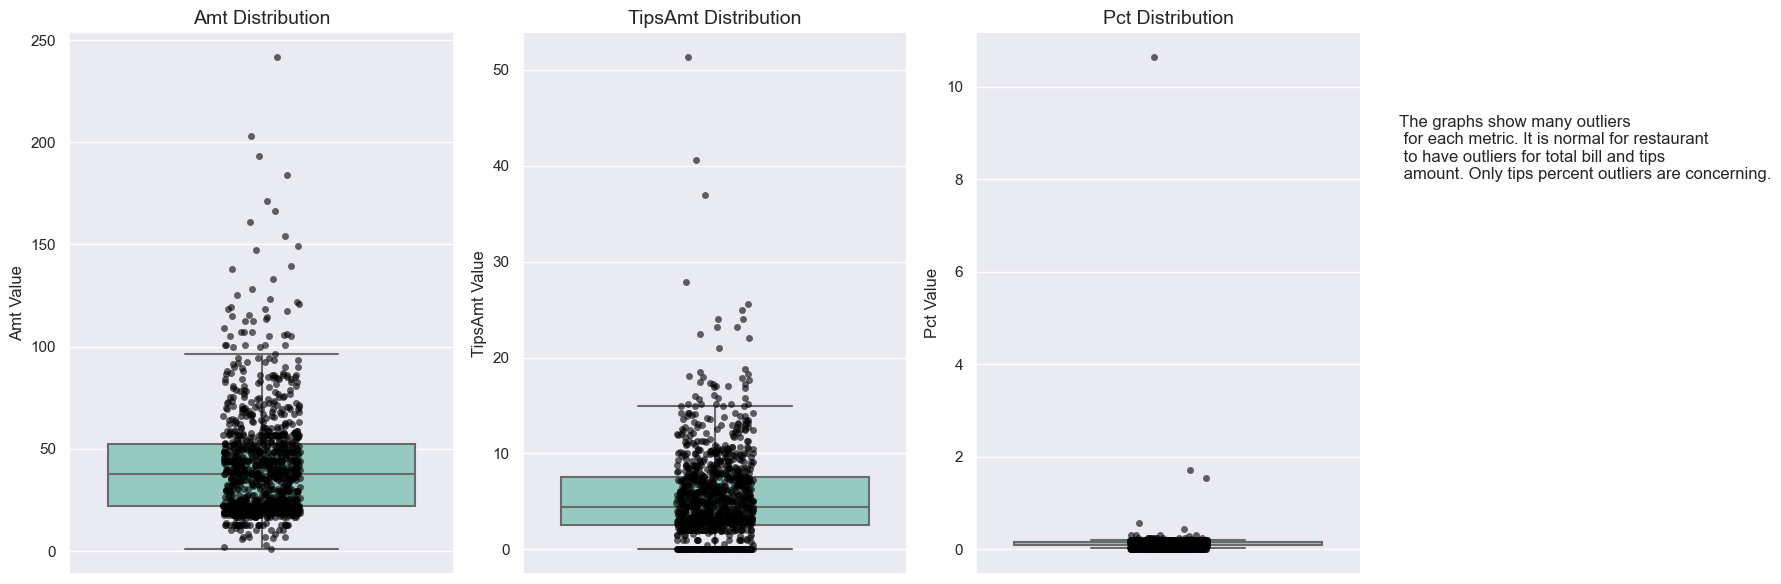

In [580]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Amt Boxplot 
sns.boxplot(ax=axes[0], y='Amt', data=gl, palette='Set3', showmeans=False, showfliers=False)
sns.stripplot(ax=axes[0], y='Amt', data=gl, color='black', size=5, jitter=True, marker='o', alpha=0.6)
axes[0].set_title('Amt Distribution', fontsize=14)
axes[0].set_ylabel('Amt Value')

#Add description text
plt.text(0.6, 8, 'The graphs show many outliers\n for each metric. It is normal for restaurant\n to have outliers for total bill and tips\n amount. Only tips percent outliers are concerning.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# TipsAmt Boxplot 
sns.boxplot(ax=axes[1], y='TipsAmt', data=gl, palette='Set3', showmeans=False, showfliers=False)
sns.stripplot(ax=axes[1], y='TipsAmt', data=gl, color='black', size=5, jitter=True, marker='o', alpha=0.6)
axes[1].set_title('TipsAmt Distribution', fontsize=14)
axes[1].set_ylabel('TipsAmt Value')

# Pct Boxplot 
sns.boxplot(ax=axes[2], y='Pct', data=gl, palette='Set3', showmeans=False, showfliers=False)
sns.stripplot(ax=axes[2], y='Pct', data=gl, color='black', size=5, jitter=True, marker='o', alpha=0.6)
axes[2].set_title('Pct Distribution', fontsize=14)
axes[2].set_ylabel('Pct Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [581]:
#With my restaurant domain knowledge, I identify that tip percent > 40% is considered to be rare and abnormal 
gl[gl['Pct'] > 0.4]

,Date,Amt,TipsAmt,Pct,JustDate
9,2024-04-04 18:00:00,5.85,10.00,1.709402,2024-04-04
62,2024-04-11 17:00:00,6.90,3.00,0.434783,2024-04-11
72,2024-03-13 15:00:00,6.90,4.00,0.579710,2024-03-13
142,2024-03-30 20:00:00,0.86,9.15,10.639535,2024-03-30
856,2024-05-26 13:00:00,1.95,3.00,1.538462,2024-05-26


In [582]:
#Drop these tip percent outliers (where Pct > 0.4)
gl = gl[gl['Pct'] <= 0.4]
gl

,Date,Amt,TipsAmt,Pct,JustDate
0,2024-03-27 12:00:00,36.75,7.35,0.200000,2024-03-27
1,2024-03-16 16:00:00,40.95,7.37,0.179976,2024-03-16
2,2024-03-16 18:00:00,42.00,5.00,0.119048,2024-03-16
3,2024-03-16 17:00:00,48.30,4.83,0.100000,2024-03-16
4,2024-03-10 13:00:00,18.90,2.84,0.150265,2024-03-10
...,...,...,...,...,...
1089,2024-04-15 12:00:00,59.85,11.97,0.200000,2024-04-15
1090,2024-04-15 12:00:00,53.55,8.02,0.149767,2024-04-15
1091,2024-04-15 17:00:00,22.05,2.95,0.133787,2024-04-15
1092,2024-04-15 17:00:00,55.65,8.35,0.150045,2024-04-15


Text(0, 0.5, 'Pct Value')

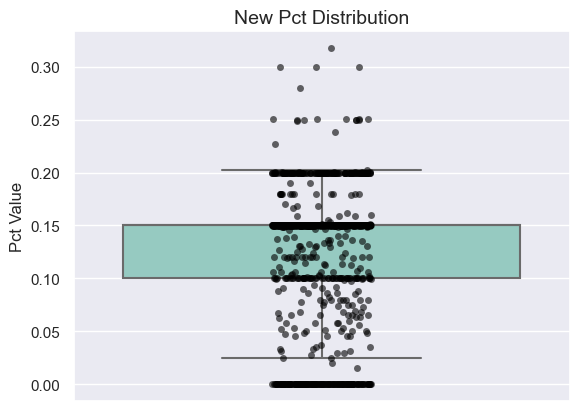

In [583]:
# Pct new Boxplot 
sns.boxplot( y='Pct', data=gl, palette='Set3', showmeans=False, showfliers=False)
sns.stripplot( y='Pct', data=gl, color='black', size=5, jitter=True, marker='o', alpha=0.6)
plt.title('New Pct Distribution', fontsize=14)
plt.ylabel('Pct Value')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13708\655335030.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[0], data= gl['Amt'], palette='Set3')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13708\655335030.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[1], data= gl['TipsAmt'], palette='Set3')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13708\655335030.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[2], data= gl['Pct'], palette='Set3')


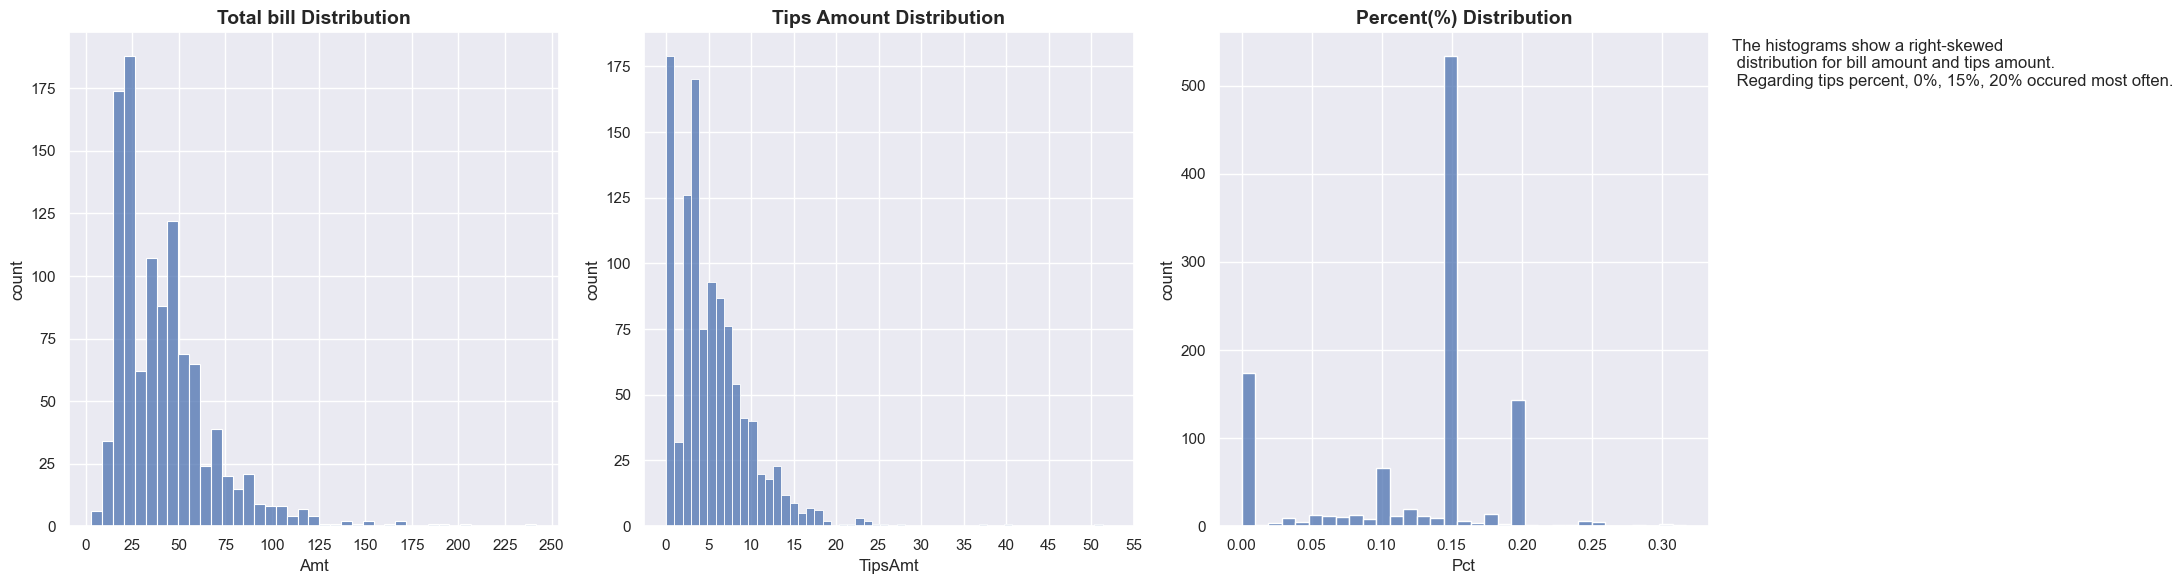

In [626]:
# Create a figure with 3 subplots histogram
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

# Amt Boxplot 
sns.histplot(ax=axes[0], data= gl['Amt'], palette='Set3')
axes[0].set_title('Total bill Distribution', fontsize=14, weight= 'bold')
axes[0].set_ylabel('count')
axes[0].set_xticks(range(0, int(gl['Amt'].max()) + 25, 25))  # Set x-axis ticks

#Add description text 
plt.text(0.35, 500, 'The histograms show a right-skewed\n distribution for bill amount and tips amount.\n Regarding tips percent, 0%, 15%, 20% occured most often.', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# TipsAmt Boxplot 
sns.histplot(ax=axes[1], data= gl['TipsAmt'], palette='Set3')
axes[1].set_title('Tips Amount Distribution', fontsize=14, weight= 'bold')
axes[1].set_ylabel('count')
axes[1].set_xticks(range(0, int(gl['TipsAmt'].max()) + 5, 5))  # Set x-axis ticks

# Pct Boxplot 
sns.histplot(ax=axes[2], data= gl['Pct'], palette='Set3')
axes[2].set_title('Percent(%) Distribution', fontsize=14,  weight= 'bold')
axes[2].set_ylabel('count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Data transformation**

In [585]:
#Add a Hour column and count hour values 
gl['Hour'] = gl['Date'].dt.hour
gl['Hour'].value_counts()

Hour
12    188
13    159
19    142
18    135
14    105
15     88
17     81
16     67
11     64
20     59
Name: count, dtype: int64

In [586]:
#Add a date name column and count date name values
gl['DateName']= gl['Date'].dt.day_name()
gl['DateName'].value_counts()


DateName
Sunday       208
Monday       203
Friday       198
Wednesday    163
Saturday     156
Thursday      80
Tuesday       80
Name: count, dtype: int64

In [587]:
# Define the function to classify the day (weekend or weekday)
def classify_day(day_name):
    if day_name in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

In [588]:
# Apply the function to create the new column
gl['DayType'] = gl['DateName'].apply(classify_day)

In [589]:
gl.head(4)

,Date,Amt,TipsAmt,Pct,JustDate,Hour,DateName,DayType
0,2024-03-27 12:00:00,36.75,7.35,0.200000,2024-03-27,12,Wednesday,Weekday
1,2024-03-16 16:00:00,40.95,7.37,0.179976,2024-03-16,16,Saturday,Weekend
2,2024-03-16 18:00:00,42.00,5.00,0.119048,2024-03-16,18,Saturday,Weekend
3,2024-03-16 17:00:00,48.30,4.83,0.100000,2024-03-16,17,Saturday,Weekend


**Insight 1: Which hour of a day receiving highest tips amount per bill.**

In [590]:
#Mean tips amount per hour
tips_hour = gl.groupby(['Hour'])['TipsAmt'].mean().reset_index()
tips_hour

,Hour,TipsAmt
0,11,4.474844
1,12,4.899681
2,13,5.538258
3,14,4.739429
4,15,4.779205
5,16,4.195373
6,17,5.547778
7,18,5.989333
8,19,6.213803
9,20,6.729322


Text(10, 6, 'Observations: The bar graph reveals that\n there are two peak hours of average\n tips amount per bill, which are 1pm and 8pm.\n Lowest average tips amount are around 11 am\n and 4pm. ')

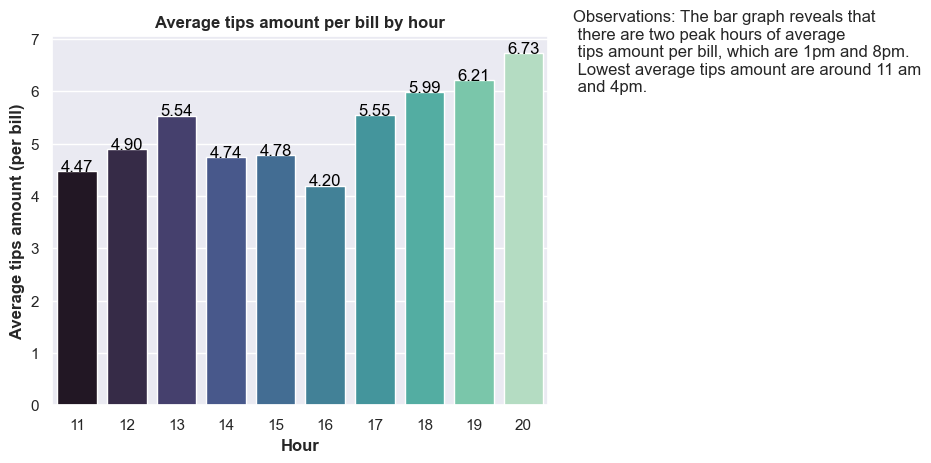

In [591]:
#Visualization
sns.barplot(data= tips_hour, x='Hour', y= 'TipsAmt', palette= 'mako')

#Add title 
plt.title('Average tips amount per bill by hour', weight = 'bold')
plt.xlabel('Hour', weight = 'bold')
plt.ylabel('Average tips amount (per bill)', weight = 'bold')

#Add value labels 
for index, row in tips_hour.iterrows():
    plt.text(row.name, row['TipsAmt'], f'{row["TipsAmt"]:.2f}', color='black', ha="center")

#Add description text 
plt.text(10, 6, 'Observations: The bar graph reveals that\n there are two peak hours of average\n tips amount per bill, which are 1pm and 8pm.\n Lowest average tips amount are around 11 am\n and 4pm. ', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

In [592]:
#Mean tips percent per hour 
tips_pct = gl.groupby('Hour')['Pct'].mean().reset_index()
tips_pct

,Hour,Pct
0,11,0.106557
1,12,0.127425
2,13,0.132363
3,14,0.116773
4,15,0.116631
5,16,0.108874
6,17,0.122956
7,18,0.124951
8,19,0.132199
9,20,0.143076


Text(10, 0.14, 'Observations: The bar graph also shows\n similar patterns to average tips amount per bill. ')

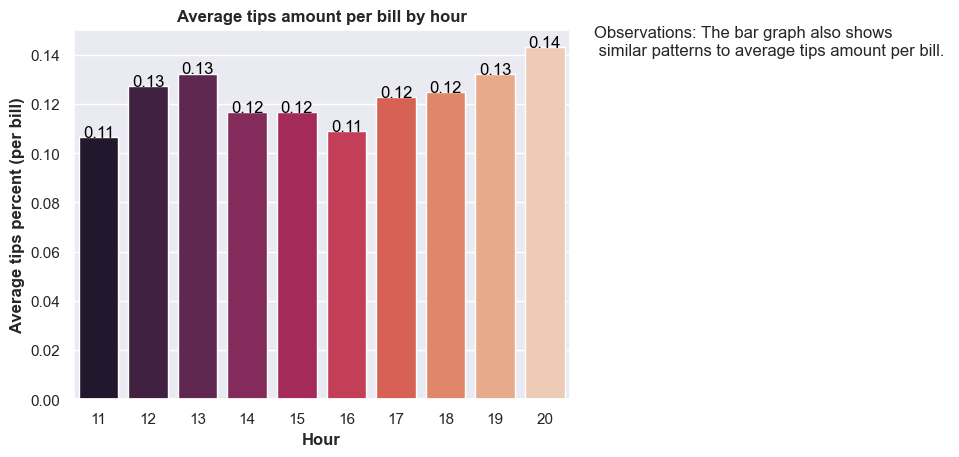

In [593]:
#Visualization
sns.barplot(data= tips_pct, x='Hour', y= 'Pct', palette= 'rocket')
#Add title 
plt.title('Average tips amount per bill by hour', weight = 'bold')
plt.xlabel('Hour', weight = 'bold')
plt.ylabel('Average tips percent (per bill)', weight = 'bold')

#Add value labels 
for index, row in tips_pct.iterrows():
    plt.text(row.name, row['Pct'], f'{row["Pct"]:.2f}', color='black', ha="center")
    
#Add description text 
plt.text(10, 0.14, 'Observations: The bar graph also shows\n similar patterns to average tips amount per bill. ', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

**Insight 2: Which day of the week receive the highest tips amount per bill**

Text(7, 5, 'Observations: The bar graph shows\n variations in median tips amount per bill\n for each day with Saturday has the highest\n median tips amount per bill, follwed by Monday and Sunday. ')

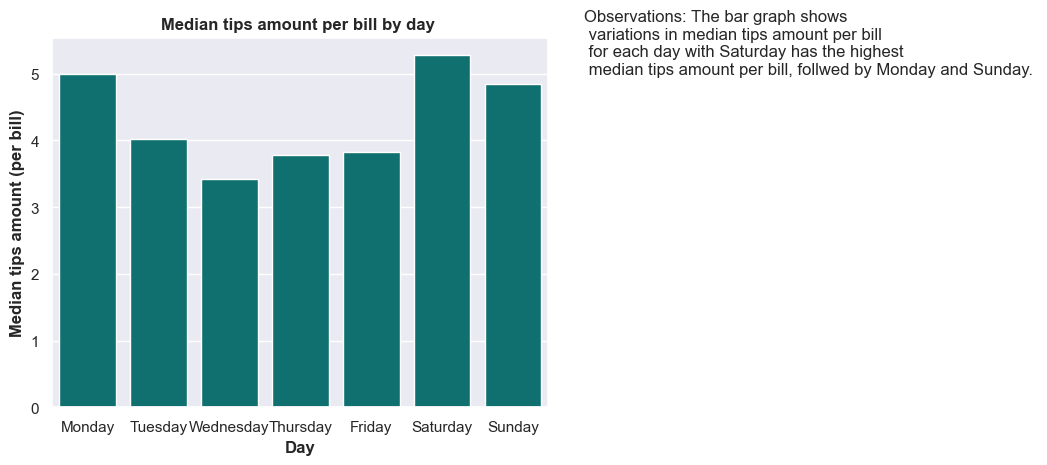

In [594]:
#Tips amount by day 
tip_day = gl.groupby('DateName')['TipsAmt'].median().reset_index()
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data= tip_day, x='DateName', y='TipsAmt', order= order, color= 'teal')

#Add title 
plt.title('Median tips amount per bill by day ', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.ylabel('Median tips amount (per bill)', weight = 'bold')

# Add description text
plt.text(7, 5, 'Observations: The bar graph shows\n variations in median tips amount per bill\n for each day with Saturday has the highest\n median tips amount per bill, follwed by Monday and Sunday. ', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))



**Insight 3: Whether tips in the weekend are higher than weekday** 

In [595]:
#group data
tip_weekend = gl.groupby('DayType')[['Pct', 'TipsAmt']].mean().reset_index()
tip_weekend

,DayType,Pct,TipsAmt
0,Weekday,0.125577,5.227624
1,Weekend,0.122980,5.604212


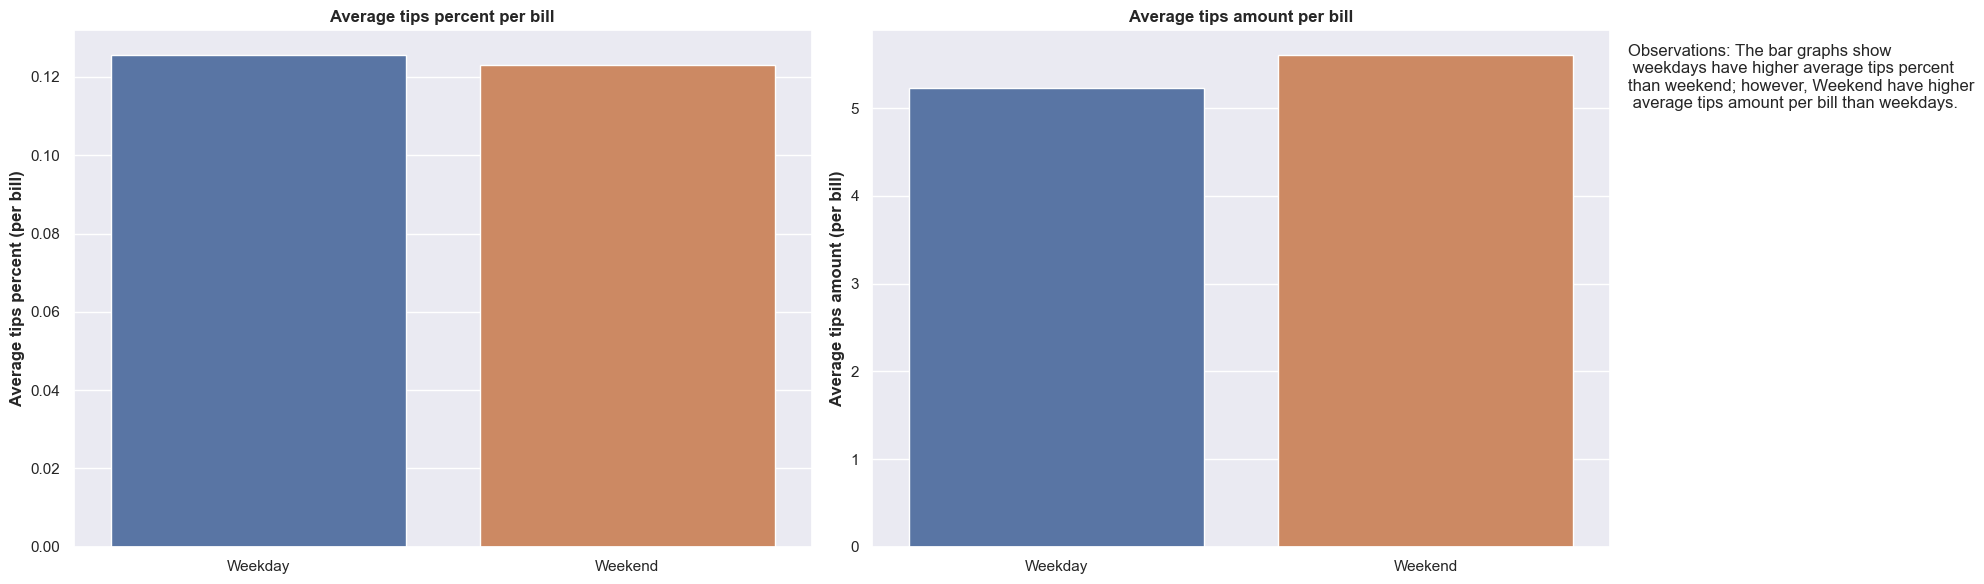

In [596]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey= False)

# Plot 1: Average tips percent per bill
sns.barplot(data=tip_weekend, x='DayType', y='Pct', ax=axes[0])
axes[0].set_title('Average tips percent per bill', weight='bold')
axes[0].set_ylabel('Average tips percent (per bill)', weight='bold')
axes[0].set_xlabel('')  

# Plot 2: Average tips amount per bill
sns.barplot(data=tip_weekend, x='DayType', y='TipsAmt', ax=axes[1])
axes[1].set_title('Average tips amount per bill', weight='bold')
axes[1].set_ylabel('Average tips amount (per bill)', weight='bold')
axes[1].set_xlabel('')  

#Add description text 
plt.text(1.55, 5, 'Observations: The bar graphs show\n weekdays have higher average tips percent \nthan weekend; however, Weekend have higher\n average tips amount per bill than weekdays.', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
# Adjust layout
plt.tight_layout()
plt.show()



In [597]:
#Test whether the results are statistically significant 
#import statistics libraries
import scipy.stats as stats
import statsmodels.stats.api as sms


#Prepare dataframes
gl_weekend = gl[gl['DayType'] == 'Weekend']   
gl_weekdays = gl[gl['DayType'] == 'Weekday']

In [598]:
#F test to identify whether 2 sample data have equal or unequal variances 
'''Hypothesis: Ho: both sample data have equal variances 
               H1: both sample data have unequal variances 
'''
#Calculate variances
var_weekend = np.var(gl_weekend['TipsAmt'], ddof=1)
var_weekdays = np.var(gl_weekdays['TipsAmt'], ddof=1)

# Calculate sample sizes
n_weekend = len(gl_weekend)
n_not_weekdays = len(gl_weekdays)

# F-statistics
F = var_weekend/var_weekdays

#Degrees of freedom
dfn = n_weekend - 1
dfd =  n_not_weekdays - 1

#P value
p_value_F = 1 - stats.f.cdf(F, dfn, dfd)

#Show values 
print('F-statistics: ', F)
print('p-value: ', p_value_F)
print('Fail to reject the null hypothesis (Ho) as we have high P value,\n our sample data have equal variances, so I proceed with the t-test assuming equal variances.')

F-statistics:  1.084769575397582
p-value:  0.18194683778738285
Fail to reject the null hypothesis (Ho) as we have high P value,
 our sample data have equal variances, so I proceed with the t-test assuming equal variances.


In [599]:
'''Hypothesis:  mean tips amount per bill for weekend is higher than weekdays
                Ho: u(weekend) <= u(weekdays)
                H1: u(weekend) > u(weekdays)
                '''
#Calculate the right-tailed critical value of 95% confidence level 
alpha = 0.05
df= dfn + dfd
t_critical = stats.t.ppf(1 - alpha, df)

print('Right-tailed T critical value:', t_critical)
print('Decision rule: reject the null hypothesis if T statistics > 1.65')

Right-tailed T critical value: 1.646257934243318
Decision rule: reject the null hypothesis if T statistics > 1.65


In [600]:
#Compute statistics
t_test_result = sms.ttest_ind(gl_weekend['TipsAmt'], gl_weekdays['TipsAmt'], alternative= 'larger', usevar='pooled')
print(t_test_result)
print('Decision: Fail to reject the null hypothesis because T statistics 1.22 < 1.65 T critical value\n          and we have P value > 0.05 alpha, meaning we dont have enough evidence to conclude tips weekend > tips weekdays')

(1.2222485751526906, 0.11093942345382525, 1086.0)
Decision: Fail to reject the null hypothesis because T statistics 1.22 < 1.65 T critical value
          and we have P value > 0.05 alpha, meaning we dont have enough evidence to conclude tips weekend > tips weekdays


**Insight 4: Whether evening shift receives higher tips amount than morning shift.**

In [601]:
gl.head(3)

,Date,Amt,TipsAmt,Pct,JustDate,Hour,DateName,DayType
0,2024-03-27 12:00:00,36.75,7.35,0.200000,2024-03-27,12,Wednesday,Weekday
1,2024-03-16 16:00:00,40.95,7.37,0.179976,2024-03-16,16,Saturday,Weekend
2,2024-03-16 18:00:00,42.00,5.00,0.119048,2024-03-16,18,Saturday,Weekend


In [602]:
# Define the function to classify the shift
def classify_shift(hour):
    if hour in [11,12,13,14,15]:
        return 'Morning shift'
    else:
        return 'Evening shift'

In [603]:
# Apply the function to create the new column
gl['ShiftType'] = gl['Hour'].apply(classify_shift)
gl.head(3)

,Date,Amt,TipsAmt,Pct,JustDate,Hour,DateName,DayType,ShiftType
0,2024-03-27 12:00:00,36.75,7.35,0.200000,2024-03-27,12,Wednesday,Weekday,Morning shift
1,2024-03-16 16:00:00,40.95,7.37,0.179976,2024-03-16,16,Saturday,Weekend,Evening shift
2,2024-03-16 18:00:00,42.00,5.00,0.119048,2024-03-16,18,Saturday,Weekend,Evening shift


In [604]:
#Average Tips amount by day and shift 
df_shift = gl.groupby(['DateName', 'ShiftType'])['TipsAmt'].mean().reset_index()
df_shift

,DateName,ShiftType,TipsAmt
0,Friday,Evening shift,5.595783
1,Friday,Morning shift,5.321652
2,Monday,Evening shift,6.585517
3,Monday,Morning shift,4.980862
4,Saturday,Evening shift,6.384000
5,Saturday,Morning shift,4.870986
6,Sunday,Evening shift,5.009688
7,Sunday,Morning shift,5.986813
8,Thursday,Evening shift,5.355588
9,Thursday,Morning shift,4.250435


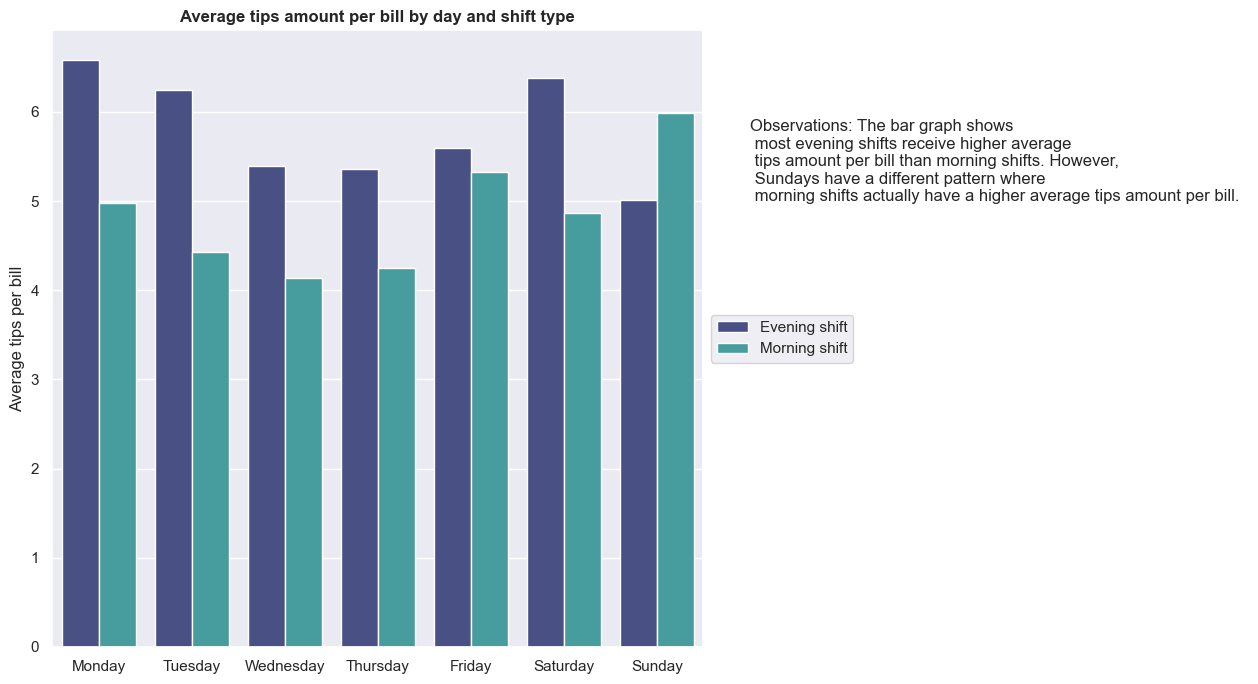

In [605]:
plt.figure(figsize=(13, 7))

# Order of the days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the barplot
sns.barplot(data=df_shift, x='DateName', y='TipsAmt', hue='ShiftType', order=order, palette='mako')

# Add title and labels
plt.title('Average tips amount per bill by day and shift type', weight='bold')
plt.ylabel('Average tips per bill')
plt.xlabel('')

# Modify the legend
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))

#Add description text 
plt.text(7, 5, 'Observations: The bar graph shows\n most evening shifts receive higher average\n tips amount per bill than morning shifts. However,\n Sundays have a different pattern where\n morning shifts actually have a higher average tips amount per bill.  ', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.tight_layout()
plt.show()



In [606]:
#Group data to verify whether evening shifts receiving higher average tips amount per bill than morning shifts
gl.groupby('ShiftType')['TipsAmt'].mean().reset_index()


,ShiftType,TipsAmt
0,Evening shift,5.823161
1,Morning shift,4.977356


In [607]:
#Prepare data frame for T test models. I aim to identify whether evening shifts receive higher average tips amount per bill than morning shifts.
gl_morning = gl[gl['ShiftType'] == 'Morning shift']
gl_evening = gl[gl['ShiftType'] == 'Evening shift']

In [608]:
#Compute sample data variances 
var_morning = np.var(gl_morning['TipsAmt'], ddof=1)
var_evening = np.var(gl_evening['TipsAmt'], ddof=1)

print('Morning shift variance: ', var_morning)
print('Evening shift variance: ', var_evening)
print('Since the variances are close to each other so I proceed with T test assuming equal variances pooled.')

Morning shift variance:  22.884763227974368
Evening shift variance:  22.804556653063635
Since the variances are close to each other so I proceed with T test assuming equal variances pooled.


In [609]:
'''
Hypotheses:  Ho: u(Evening) <= u(Morning)
             H1: u(Evening) > u(Morning)
'''

#Calculate the right-tailed critical value of 95% confidence level 
alpha = 0.05
df= dfn + dfd
t_critical = stats.t.ppf(1 - alpha, df)

print('Right-tailed T critical value:', t_critical)
print('Decision rule: reject the null hypothesis (Ho) if T statistics > 1.65')

Right-tailed T critical value: 1.646257934243318
Decision rule: reject the null hypothesis (Ho) if T statistics > 1.65


In [610]:
#Compute statistics
t_test_result = sms.ttest_ind(gl_evening['TipsAmt'], gl_morning['TipsAmt'], alternative= 'larger', usevar='pooled')
print(t_test_result)
print('Decision: Reject the null hypothesis (Ho) because T statistics 2.9 > 1.65 T critical value\n          and we have P value < 0.05 alpha, meaning we can conclude average evening tip amount per bill  > morning shifts')

(2.9004313167549114, 0.0019007995672608731, 1086.0)
Decision: Reject the null hypothesis (Ho) because T statistics 2.9 > 1.65 T critical value
          and we have P value < 0.05 alpha, meaning we can conclude average evening tip amount per bill  > morning shifts


**Insight 5: 	Correlation between tips amount and total bill**

In [611]:
#Compute correlation coefficient between Amt and TipsAmt
gl_corr = gl['Amt'].corr(gl['TipsAmt'])
print(gl_corr, ' (strong relationship)')

0.7887869499514535  (strong relationship)


Text(7, 40, 'Strong relationship between\n Total bill and tips amount\n (r = 0.79) ')

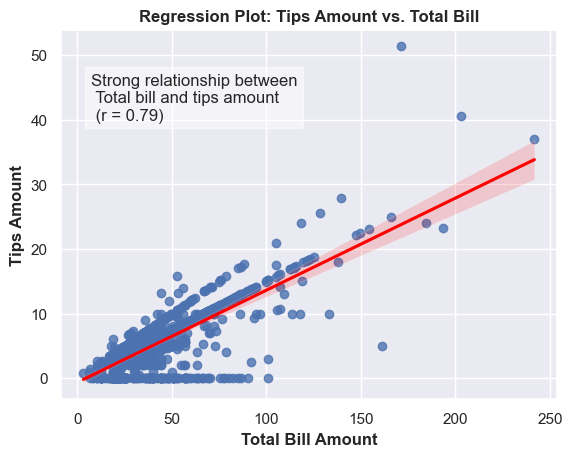

In [616]:
# Create a visualization regression plot
sns.set_palette('deep')

sns.regplot(
    data=gl,
    x="Amt", y="TipsAmt", line_kws= {'color': 'red'}
)

# Add the title and labels
plt.title('Regression Plot: Tips Amount vs. Total Bill', weight='bold')
plt.xlabel('Total Bill Amount', weight='bold')
plt.ylabel('Tips Amount', weight='bold')

#Add description text 
plt.text(7, 40, 'Strong relationship between\n Total bill and tips amount\n (r = 0.79) ', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


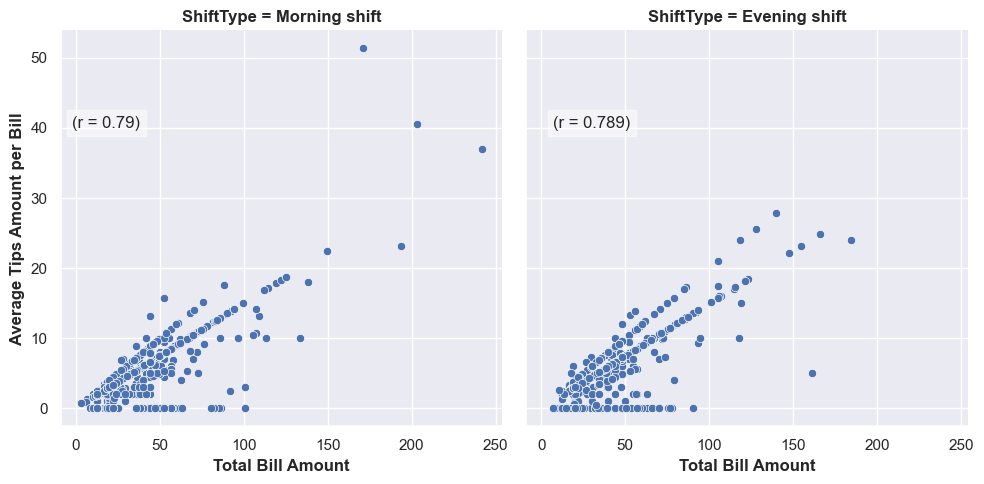

In [617]:
# Create the relplot with a regression line and set labels directly
g = sns.relplot(
    data=gl,
    x="Amt", y="TipsAmt", col="ShiftType",
    height=5, aspect=1, 
    facet_kws={'sharey': True, 'sharex': True}  # Ensure the axes are consistent across facets
)

# Set the labels and titles with bold font directly

g.set_titles( fontweight='bold')
g.set_xlabels("Total Bill Amount", weight='bold')
g.set_ylabels("Average Tips Amount per Bill", weight='bold')

#Add description text 
plt.text(7, 40, '(r = 0.789)', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.text(-279, 40, '(r = 0.79)', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

In [628]:
gl.describe(include = 'all')

,Date,Amt,TipsAmt,Pct,JustDate,Hour,DateName,DayType,ShiftType
count,1088,1088.000000,1088.000000,1088.000000,1088,1088.000000,1088,1088,1088
unique,NaN,NaN,NaN,NaN,58,NaN,7,2,2
top,NaN,NaN,NaN,NaN,2024-06-14,NaN,Sunday,Weekday,Morning shift
freq,NaN,NaN,NaN,NaN,43,NaN,208,724,604
mean,2024-04-30 11:47:32.205882368,41.999260,5.353615,0.124708,NaN,15.233456,NaN,NaN,NaN
min,2024-03-10 13:00:00,3.150000,0.000000,0.000000,NaN,11.000000,NaN,NaN,NaN
25%,2024-03-29 12:00:00,22.050000,2.520000,0.100000,NaN,13.000000,NaN,NaN,NaN
50%,2024-04-27 17:00:00,37.800000,4.410000,0.150000,NaN,15.000000,NaN,NaN,NaN
75%,2024-05-27 18:00:00,52.500000,7.552500,0.150140,NaN,18.000000,NaN,NaN,NaN
max,2024-08-05 19:00:00,241.740000,51.350000,0.317460,NaN,20.000000,NaN,NaN,NaN


**Tableau visualization dashboard**

https://public.tableau.com/views/Restauranttipsanalysis/Descriptive_data?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link